In [1]:
import os
import torch

%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd

from Datasets import Inference_Dataset, Inference_Collater

# Hyper parameters

In [2]:
sample_Rate = 24000
reduction= 2 ** (6 // 2 + 1)
os.environ['CUDA_VISIBLE_DEVICES']= '7' # Last gpu

# Model load

In [3]:
denoiser = torch.jit.load('RHRNet.pts')

In [4]:
device = torch.device('cuda:0')
torch.cuda.set_device(0)
denoiser = denoiser.to(device)

In [5]:
denoiser

RecursiveScriptModule(
  original_name=RHRNet
  (layer_Dict): RecursiveScriptModule(
    original_name=ModuleDict
    (GRU_0): RecursiveScriptModule(original_name=GRU)
    (GRU_1): RecursiveScriptModule(original_name=GRU)
    (GRU_2): RecursiveScriptModule(original_name=GRU)
    (GRU_3): RecursiveScriptModule(original_name=GRU)
    (GRU_4): RecursiveScriptModule(original_name=GRU)
    (PReLU_4): RecursiveScriptModule(original_name=PReLU)
    (GRU_5): RecursiveScriptModule(original_name=GRU)
    (PReLU_5): RecursiveScriptModule(original_name=PReLU)
    (Last): RecursiveScriptModule(original_name=GRU)
  )
)

# Type here you want!

In [6]:
label = '001'
path = './Inference_Wav/sjh01_02_02.wav'

# Result

In [7]:
batch = next(iter(torch.utils.data.DataLoader(
    dataset= Inference_Dataset([[label, path]], sample_Rate),
    shuffle= False,
    collate_fn= Inference_Collater(reduction),
    batch_size= 1,
    num_workers= 0,
    pin_memory= True
    )))
batch[0] = batch[0].to(device)

In [9]:
denoised_Wav = denoiser(batch[0])[0].cpu().numpy()

In [10]:
ipd.Audio(denoised_Wav, rate=24000)

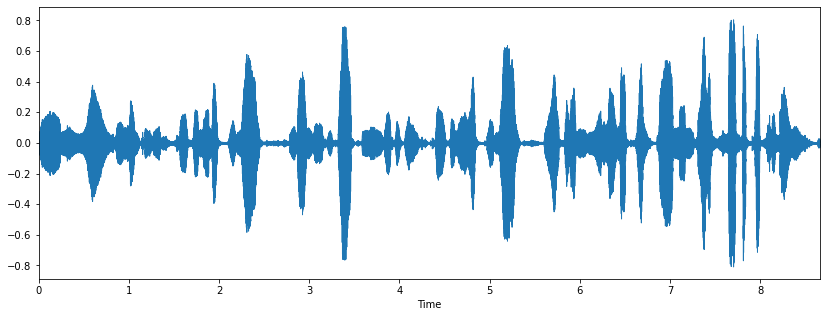

In [11]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(denoised_Wav, sr=24000)
plt.margins(x=0)